**Выбор метрики:**
Для измерения качества мультфильмов можно использовать метрику IMDb рейтинга. IMDb предоставляет общую оценку произведения, основанную на отзывах зрителей, что делает ее релевантной для оценки качества шоу. В данном случае оценка от IMDb может быть использована как мера общего восприятия шоу зрителями.

**EDA и предобработка данных:**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

   Id                     Title  Episodes       Year  Original channel  \
0   1             2 Stupid Dogs      26.0  1993-1995               TBS   
1   2           3-2-1 Penguins!      27.0  2000-2008   Direct to video   
2   3                   3-South      13.0  2002-2003               MTV   
3   4  3Below: Tales of Arcadia      28.0  2018-2019           Netflix   
4   5                3rd & Bird      51.0  2008-2010  Playhouse Disney   

                      American company                   Note    Technique  \
0                        Hanna-Barbera                    NaN  Traditional   
1                 Big Idea Productions                    NaN          CGI   
2  Warner Bros. AnimationMTV Animation                    NaN  Traditional   
3      DreamWorks Animation Television                    NaN          CGI   
4          Little Airplane Productions  British co-production        Flash   

   IMDb Google users  
0   7.2          91%  
1   6.5          91%  
2   8.0          

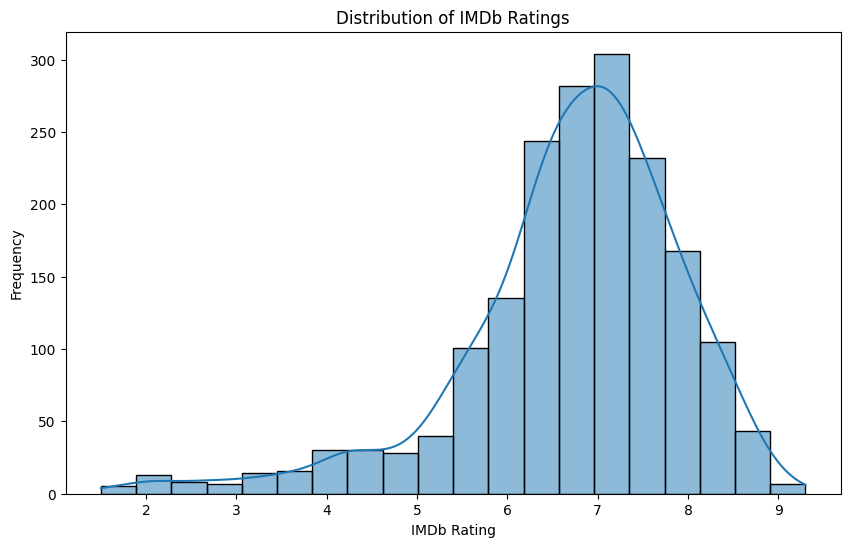

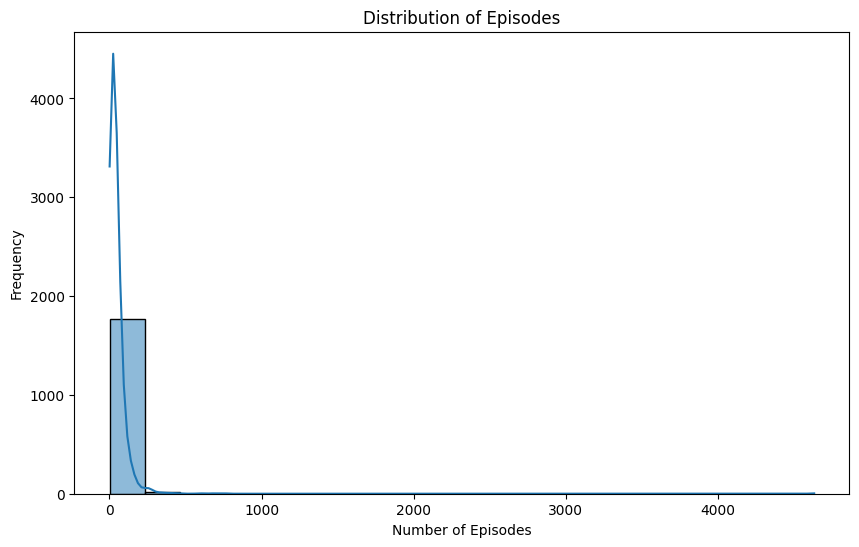

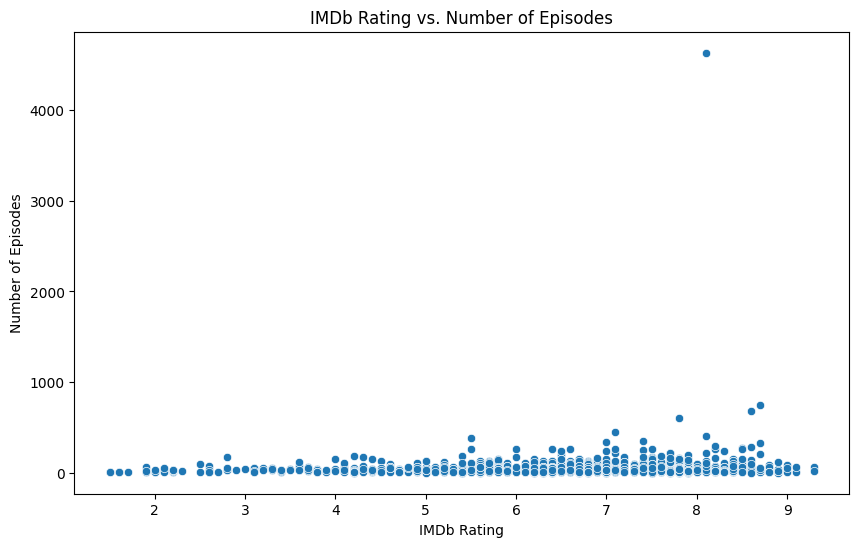

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Загрузка данных
df = pd.read_csv('/Animated_Tv_Series[1].csv', encoding='latin1')

# Первые строки данных
print(df.head())

# Базовые статистики
print(df.describe())

# Проверка на пропущенные значения
print(df.isnull().sum())

# Распределение рейтингов IMDb
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

# Распределение количества эпизодов
plt.figure(figsize=(10, 6))
sns.histplot(df['Episodes'], bins=20, kde=True)
plt.title('Distribution of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()

# Визуализация корреляции между рейтингом IMDb и количеством эпизодов
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDb', y='Episodes', data=df)
plt.title('IMDb Rating vs. Number of Episodes')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Episodes')
plt.show()


Обнаружение пустых значений

In [ ]:
df.isna()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1811,False,False,False,False,False,False,False,False,False,False
1812,False,False,False,False,False,False,False,False,False,False
1813,False,False,False,False,True,False,True,False,False,False
1814,False,False,False,False,False,False,True,False,False,False


Удаление пустых значений

In [ ]:
df.dropna(inplace=True)

Датасет содержит информацию о 18160 мультфильмах, включая название, количество эпизодов, год выпуска, оригинальный канал и другие характеристики.
Пропущенных значений в данных нет.
Распределение рейтингов IMDb показывает, что большинство мультфильмов имеют рейтинг от 6 до 8.
Распределение количества эпизодов показывает, что большинство мультфильмов имеют менее 100 эпизодов.
Визуализация корреляции между рейтингом IMDb и количеством эпизодов показывает, что нет явной линейной зависимости между этими двумя переменными.
Построение и оценка качества бейзлайна:
Для бейзлайна используем константное предсказание - среднее значение рейтинга IMDb.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающий и тестовый наборы
X = df[['Episodes']]  # Признаки
y = df['IMDb']         # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = rf_model.predict(X_test)

# Оценка качества модели
rf_mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE: {rf_mse}')



Random Forest MSE: 1.603131297978015
